# Task 1: Overview
1. Reading in the data

2. Showing the first few rows

In [58]:
import pandas as pd
import numpy as np

In [61]:
cookie_cats = pd.read_csv('cookie_cats.csv')
cookie_cats.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


# Task 2: The A/B Test
Counting the number of players in each AB group.

In [62]:
ab_group = cookie_cats.groupby(['version'])\
                ['userid'].nunique()
ab_group

version
gate_30    44700
gate_40    45489
Name: userid, dtype: int64

# Task 3: The distribution of game rounds

1. Counting the number of players for each number of game rounds
2. Plotting the distribution of players that played 0 to 100 game rounds

In [63]:
game_rounds = cookie_cats.groupby(['sum_gamerounds'])\
                        ['userid'].nunique()
game_rounds

sum_gamerounds
0        3994
1        5538
2        4606
3        3958
4        3629
         ... 
2294        1
2438        1
2640        1
2961        1
49854       1
Name: userid, Length: 942, dtype: int64

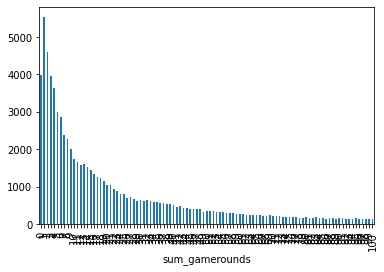

In [64]:
import matplotlib.pyplot as plt
game_rounds2 = game_rounds[0:101]
game_rounds2.plot(kind = 'bar')
plt.show()

# Task 4: Overall 1-day retention
The % of users that came back the day after they installed

In [65]:
retainers_day_1 = cookie_cats[cookie_cats['retention_1'] == True]\
                            ['userid'].nunique()
total_user = cookie_cats['userid'].nunique()
ret_rate = retainers_day_1/total_user
print(round(ret_rate*100,2), '%')

44.52 %


# Task 5: 1-day retention by AB-group
Calculating 1-day retention for each AB-group

In [66]:
group_a = cookie_cats[cookie_cats['version'] == 'gate_30']
retainers_a_day1 = group_a[group_a['retention_1'] == True]['userid'].nunique()
ret_rate_a = retainers_a_day1/len(group_a)
print('Group A 1 day retention rate: ', round(ret_rate_a*100, 2), '%')
group_b = cookie_cats[cookie_cats['version'] == 'gate_40']
retainers_b_day1 = group_b[group_b['retention_1'] == True]['userid'].nunique()
ret_rate_b = retainers_b_day1/len(group_b)
print('Group B 1 day retention rate: ', round(ret_rate_b*100, 2), '%')

Group A 1 day retention rate:  44.82 %
Group B 1 day retention rate:  44.23 %


# Task 6: Should we be confident in the difference?
1. Creating an list with bootstrapped means for each AB-group
2. Transforming the list to a DataFrame
3. A Kernel Density Estimate plot of the bootstrap distributions

In [76]:
from sklearn.utils import resample  
boot_1d_a = [] # Group A
iterations = 500
for i in range(iterations):
    boot_mean = resample(group_a, replace=1)
    boot_1d_a.append(boot_mean)
boot_1d_a

[        userid  version  sum_gamerounds  retention_1  retention_7
 13941  1544515  gate_30             164         True         True
 72998  8085367  gate_30               2        False        False
 81797  9062072  gate_30              23        False        False
 49466  5487097  gate_30             245         True         True
 82286  9116837  gate_30              14        False        False
 ...        ...      ...             ...          ...          ...
 3872    429306  gate_30               2        False        False
 28477  3174812  gate_30              15         True        False
 411      41192  gate_30              28        False        False
 21911  2439149  gate_30              18         True        False
 63362  7017552  gate_30               6        False        False
 
 [44700 rows x 5 columns],
         userid  version  sum_gamerounds  retention_1  retention_7
 81912  9076454  gate_30             218         True        False
 15536  1725224  gate_30         

In [77]:
boot_1d_b = [] # Group B
iterations = 500
for i in range(iterations):
    boot_mean = resample(group_b, replace=1)
    boot_1d_b.append(boot_mean)
boot_1d_b

[        userid  version  sum_gamerounds  retention_1  retention_7
 84324  9347557  gate_40              20        False        False
 21608  2406460  gate_40              60         True        False
 55922  6198921  gate_40              60        False        False
 22727  2531156  gate_40              33         True        False
 76604  8482891  gate_40              12        False        False
 ...        ...      ...             ...          ...          ...
 49238  5458477  gate_40              55         True        False
 75703  8384175  gate_40               0        False        False
 64747  7172416  gate_40              21         True        False
 10237  1128744  gate_40              58        False         True
 34393  3810418  gate_40               1        False        False
 
 [45489 rows x 5 columns],
         userid  version  sum_gamerounds  retention_1  retention_7
 11376  1256278  gate_40             802         True         True
 60467  6698260  gate_40         

In [91]:
boot_1d_a_df = pd.concat(boot_1d_a) # Transforming the list to dataframe Group A
boot_1d_a_df
    

,userid,version,sum_gamerounds,retention_1,retention_7
13941,1544515,gate_30,164,True,True
72998,8085367,gate_30,2,False,False
81797,9062072,gate_30,23,False,False
49466,5487097,gate_30,245,True,True
82286,9116837,gate_30,14,False,False
...,...,...,...,...,...
88338,9792621,gate_30,5,False,False
8094,892437,gate_30,1,False,False
82800,9173509,gate_30,17,False,True
41411,4581727,gate_30,58,True,False


In [92]:
boot_1d_b_df = pd.concat(boot_1d_b) # Transforming the list to dataframe Group B
boot_1d_b_df

,userid,version,sum_gamerounds,retention_1,retention_7
84324,9347557,gate_40,20,False,False
21608,2406460,gate_40,60,True,False
55922,6198921,gate_40,60,False,False
22727,2531156,gate_40,33,True,False
76604,8482891,gate_40,12,False,False
...,...,...,...,...,...
45325,5022212,gate_40,16,False,False
3285,364656,gate_40,2,False,False
6850,760126,gate_40,60,False,False
41397,4579578,gate_40,27,True,False
